In [406]:
import pandas as pd


In [407]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [409]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

In [410]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [411]:
Y = data['affair']

In [412]:
model = LogisticRegression()

In [413]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [414]:
model.fit(X_train, Y_train)

LogisticRegression()

In [415]:
predictions = model.predict_proba(X_test)

In [416]:
predictions

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037],
       ...,
       [0.54059868, 0.45940132],
       [0.79790213, 0.20209787],
       [0.77284695, 0.22715305]])

In [417]:
fpr,tpr,precision,recall = [], [], [], []

In [418]:
for i in range(0, 90, 1):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= i/100:
            predicted = 1
        else:
            predicted = 0
    
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
    
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    
    tpr.append(tp/(tp + fn))
    fpr.append(fp/(fp + tn))
    precision.append(tp/(tp + fp))
    recall.append(tp/(tp + fn))   

In [419]:
import  matplotlib.pyplot as plt

(0.0, 1.0)

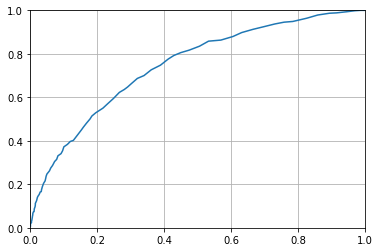

In [420]:
plt.plot( fpr, tpr )
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [421]:
from sklearn.metrics import roc_curve

In [422]:
fpr2, tpr2, thres = roc_curve( Y_test, predictions[:, 1] )

In [423]:
for line in zip( fpr2, tpr2, thres ):
    print( line )

(0.0, 0.0, 1.929209123050617)
(0.0, 0.0016474464579901153, 0.9292091230506171)
(0.0, 0.008237232289950576, 0.8999886283790526)
(0.0007674597083653108, 0.008237232289950576, 0.8977304708614894)
(0.0007674597083653108, 0.019769357495881382, 0.8650840092080672)
(0.0030698388334612432, 0.019769357495881382, 0.8547129967930437)
(0.0030698388334612432, 0.023064250411861616, 0.8544826971561025)
(0.003837298541826554, 0.023064250411861616, 0.8521926905898137)
(0.003837298541826554, 0.03130148270181219, 0.8338303452187495)
(0.004604758250191865, 0.03130148270181219, 0.8336073217483617)
(0.004604758250191865, 0.03789126853377265, 0.8248957640491006)
(0.005372217958557176, 0.03789126853377265, 0.8231501861049967)
(0.005372217958557176, 0.04118616144975288, 0.8191949402442048)
(0.0061396776669224865, 0.04118616144975288, 0.8186308250126065)
(0.0061396776669224865, 0.04942339373970346, 0.8087952641472752)
(0.006907137375287797, 0.04942339373970346, 0.8081343478406998)
(0.006907137375287797, 0.05766

(0.0, 1.0)

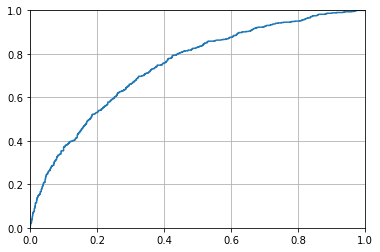

In [424]:
plt.plot( fpr2, tpr2 )
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

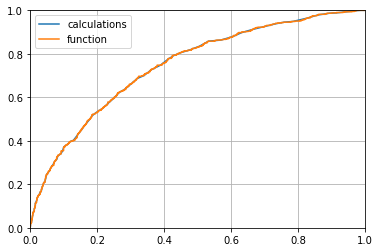

In [425]:
plt.plot( fpr, tpr, label = 'calculations' )
plt.plot( fpr2, tpr2, label = 'function' )
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend( loc = 0 )

(0.0, 1.0)

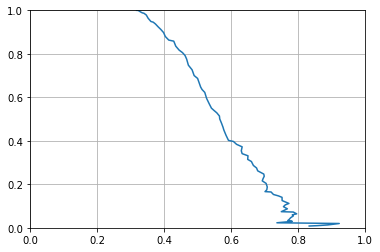

In [426]:
plt.plot( precision, recall )
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [427]:
from sklearn.metrics import precision_recall_curve

In [428]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [429]:
for line in zip( pr, re, thres ):
    print( line )

(0.32338838572189665, 1.0, 0.07582923294002754)
(0.3230277185501066, 0.9983525535420099, 0.07617596144825804)
(0.3232, 0.9983525535420099, 0.07800501841530655)
(0.3233724653148346, 0.9983525535420099, 0.07833731258003844)
(0.32354511478910836, 0.9983525535420099, 0.0785865279061178)
(0.32371794871794873, 0.9983525535420099, 0.07969132501234068)
(0.3238909673971138, 0.9983525535420099, 0.07987106595736188)
(0.3240641711229946, 0.9983525535420099, 0.08031367514011782)
(0.32423756019261635, 0.9983525535420099, 0.0805386055571401)
(0.3238758029978587, 0.9967051070840197, 0.08068797173783515)
(0.32404927691483665, 0.9967051070840197, 0.08099233420931387)
(0.3236870310825295, 0.9950576606260296, 0.08121210593179423)
(0.32386058981233246, 0.9950576606260296, 0.08256997110039953)
(0.3240343347639485, 0.9950576606260296, 0.08293373491603731)
(0.32420826623725174, 0.9950576606260296, 0.08296584568416182)
(0.32438238453276047, 0.9950576606260296, 0.08327802214815916)
(0.3247311827956989, 0.995057

(0.0, 1.0)

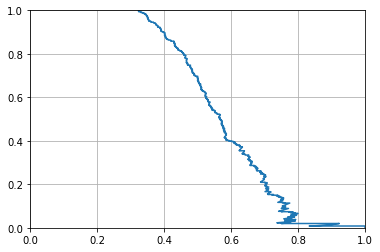

In [430]:
plt.plot( pr, re )
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

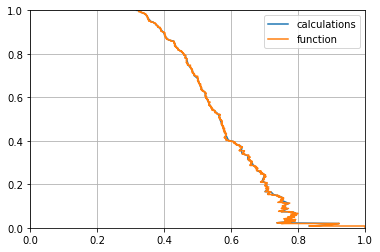

In [431]:
plt.plot( precision, recall, label = 'calculations'  )
plt.plot( pr, re, label = 'function'  )
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend( loc = 0 )